# Data preparation

In [1]:
import pandas as pd

# Reading diabetes data
df = pd.read_csv('diabetes.csv')
df = df[(df['BMI'] != 0) & (df['SkinThickness'] != 0) & (df['BloodPressure'] != 0)]

# Separating training data from validation data randomly
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

# Getting the lowest and highest values from the dataset
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
# Formatting data to work better with deep learning
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Splitting out the quality column from the data
# Creating X and y
X_train = df_train.drop('Outcome', axis=1)
X_valid = df_valid.drop('Outcome', axis=1)
y_train = df_train['Outcome']
y_valid = df_valid['Outcome']

df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


# Setting the model

In [2]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# Creating early_stop rule
early_stopping = callbacks.EarlyStopping(
    min_delta=0.0023, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Creating neural network model deepness and wideness
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[8]),
    layers.Dropout(rate=0.3),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(1),
])

# Setting the configuration for optimization beetwen epochs and the loss function calculation
model.compile(
    optimizer='adam',
    loss='mae',
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Testing the model

In the following plot you will see how both lines, of training data loss and validation data loss, react to each iteration of the evolving choise making algorithm.

The problem is that you need to get a good ammount of *val_loss* so you don't get underfitted and stop trying to get better results with the training data before you get overfitted.

If you train too much and get very overfitted the *val_loss* will get higher than ideal.

If you don't train enough it means the model is underfitted and is not good for the validation data, this can be seen if both lines are near to each other.

Instructions for updating:
Use tf.cast instead.
Minimum validation loss: 0.27246037125587463


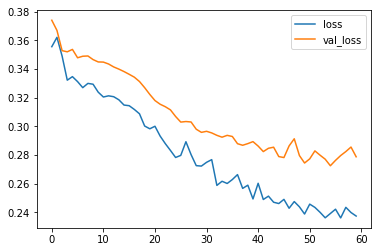

In [3]:
# Start fitting
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500, # Very high number of epochs because of early_stopping
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Minimum validation loss: 0.27246037125587463


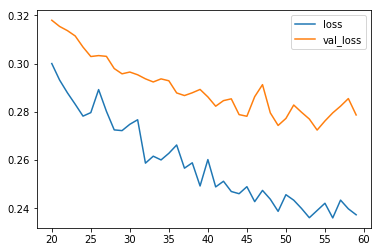

In [4]:
history_df.loc[20:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))